## **Libraries**

In [3]:
# import libraries
import polars as pl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
df = pl.read_excel("dataset_scoring_bank_subset.xlsx")

In [5]:
# head of the dataframe
print(df.head())

shape: (5, 17)
┌───────────┬──────────┬─────────┬──────────────┬───┬──────┬────────┬────────────┬────────────┐
│ objective ┆ ExStatus ┆ gender3 ┆ productcount ┆ … ┆ tf68 ┆ p13rcy ┆ amttagalog ┆ bmoy1intep │
│ ---       ┆ ---      ┆ ---     ┆ ---          ┆   ┆ ---  ┆ ---    ┆ ---        ┆ ---        │
│ str       ┆ str      ┆ i64     ┆ i64          ┆   ┆ i64  ┆ f64    ┆ f64        ┆ f64        │
╞═══════════╪══════════╪═════════╪══════════════╪═══╪══════╪════════╪════════════╪════════════╡
│ positive  ┆ train    ┆ 0       ┆ 8            ┆ … ┆ 1160 ┆ 0.0    ┆ 0.0        ┆ 0.05       │
│ positive  ┆ train    ┆ 1       ┆ 2            ┆ … ┆ 707  ┆ 0.0    ┆ 0.0        ┆ 0.01       │
│ positive  ┆ train    ┆ 0       ┆ 9            ┆ … ┆ 968  ┆ 0.0    ┆ 0.0        ┆ 0.01       │
│ positive  ┆ train    ┆ 0       ┆ 7            ┆ … ┆ 630  ┆ 0.0    ┆ 0.0        ┆ 0.0        │
│ positive  ┆ train    ┆ 0       ┆ 5            ┆ … ┆ 778  ┆ 0.0    ┆ 0.0        ┆ 0.02       │
└───────────┴──────────┴─

In [7]:
# list of columns
for col in df.columns:
    print(col)

objective
ExStatus
gender3
productcount
tf100
bknfren
ahh6ppers
p05trans
p02rcy
bfiinca
gender1
brlanglic
p12rcy
tf68
p13rcy
amttagalog
bmoy1intep


In [8]:
# shape of the dataframe
print(df.shape)

(2158, 17)


In [9]:
# Split the data based on ExStatus
train_df = df.filter(pl.col("ExStatus") == "train").drop("ExStatus")
test_df = df.filter(pl.col("ExStatus") == "test").drop("ExStatus")

# Print the dimensions of both datasets
print("Training set shape:", train_df.shape)
print("Test set shape:", test_df.shape)

Training set shape: (1158, 16)
Test set shape: (1000, 16)


In [18]:
# value counts
print(train_df["objective"].value_counts())


shape: (2, 2)
┌───────────┬───────┐
│ objective ┆ count │
│ ---       ┆ ---   │
│ str       ┆ u32   │
╞═══════════╪═══════╡
│ negative  ┆ 567   │
│ positive  ┆ 591   │
└───────────┴───────┘


In [15]:
print(test_df["objective"].value_counts())

shape: (2, 2)
┌───────────┬───────┐
│ objective ┆ count │
│ ---       ┆ ---   │
│ str       ┆ u32   │
╞═══════════╪═══════╡
│ negative  ┆ 512   │
│ positive  ┆ 488   │
└───────────┴───────┘


In [22]:
# Prepare target variables (y)
y_train = train_df["objective"].map_elements(lambda x: 1 if x == "positive" else 0)
y_test = test_df["objective"].map_elements(lambda x: 1 if x == "positive" else 0)

# Prepare feature matrices (X) by dropping the target column
X_train = train_df.drop("objective")
X_test = test_df.drop("objective")


# Print shapes to verify
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1158, 15)
y_train shape: (1158,)
X_test shape: (1000, 15)
y_test shape: (1000,)


C:\Users\lcisse\AppData\Local\Temp\ipykernel_16864\745774846.py:2: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
  y_train = train_df["objective"].map_elements(lambda x: 1 if x == "positive" else 0)
C:\Users\lcisse\AppData\Local\Temp\ipykernel_16864\745774846.py:3: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
  y_test = test_df["objective"].map_elements(lambda x: 1 if x == "positive" else 0)


## **Modélisation avec l’analyse discriminante**

In [24]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Create and fit the LDA model
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# print coefficients and intercept
print("Coefficients:", lda.coef_)
print("Intercept:", lda.intercept_)

Coefficients: [[-2.43980061e+00  1.49549110e-01  6.26890839e+00 -2.64238366e+00
  -9.24022187e+00 -3.07609566e+00  7.85663395e-01  1.06274640e-05
  -5.13621486e-01  2.63358238e+00  6.09641780e-01  2.55404793e-04
   6.63902403e-01 -2.28069744e+01  6.17691722e+00]]
Intercept: [-0.80557259]


## **Construction de la courbe de gain**

In [26]:
# predict probabilities
y_pred_proba = lda.predict_proba(X_test)

In [27]:
# show the classes_
print(lda.classes_)

[0 1]


In [28]:
# Get the positive class probabilities (second column of y_pred_proba)
scores = y_pred_proba[:, 1]

# Calculate and print the mean score
mean_score = np.mean(scores)
print(f"Mean probability score for positive class: {mean_score:.4f}")

Mean probability score for positive class: 0.5242


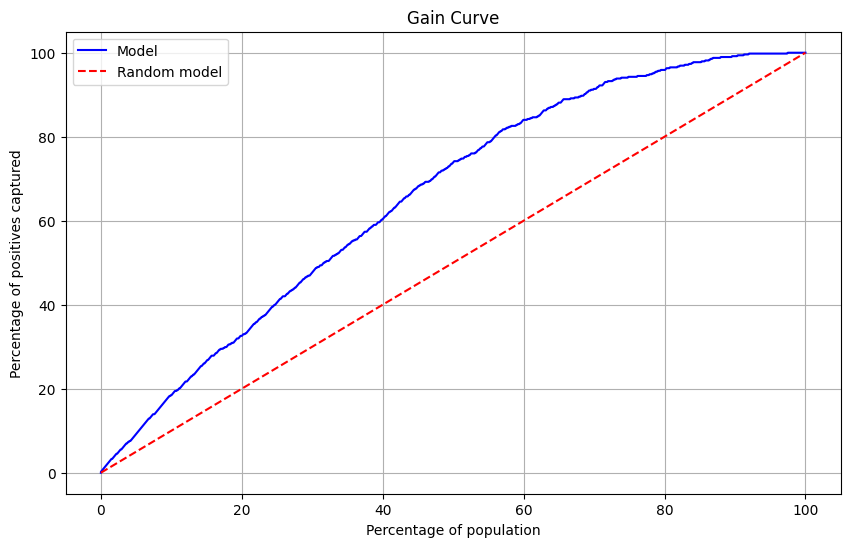

In [31]:
# Calculate cumulative gains
def gain_curve(y_true, y_score):
    # Sort by score in descending order
    sorted_indices = np.argsort(y_score)[::-1]
    y_true_sorted = y_true[sorted_indices]
    
    # Calculate cumulative positives
    cum_positives = np.cumsum(y_true_sorted)
    total_positives = cum_positives[-1]
    
    # Calculate percentages
    percentages = np.linspace(0, 100, len(y_true))
    gains = (cum_positives / total_positives) * 100
    
    # Add the origin point (0,0)
    percentages = np.insert(percentages, 0, 0)
    gains = np.insert(gains, 0, 0)
    
    return percentages, gains

# Calculate perfect and random curves
y_test_np = y_test.to_numpy()
perfect_percentages, perfect_gains = gain_curve(y_test_np, y_test_np)
random_gains = perfect_percentages

# Calculate actual curve
percentages, gains = gain_curve(y_test_np, scores)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(percentages, gains, 'b-', label='Model')
plt.plot(perfect_percentages, random_gains, 'r--', label='Random model')

plt.xlabel('Percentage of population')
plt.ylabel('Percentage of positives captured')
plt.title('Gain Curve')
plt.legend()
plt.grid(True)
plt.show()

In [32]:
# Calculate the percentage of positives captured at 30% of population
target_percentage = 30
idx = (np.abs(percentages - target_percentage)).argmin()
capture_rate = gains[idx]

# Calculate the number of positives in a population of 50000 with the same positive rate as test set
total_positives = (y_test_np.mean() * 50000)
captured_positives = total_positives * (capture_rate / 100)

print(f"Percentage of positives captured at {target_percentage}% of population: {capture_rate:.1f}%")
print(f"Estimated number of positives captured in top 15000: {int(captured_positives)}")

Percentage of positives captured at 30% of population: 47.7%
Estimated number of positives captured in top 15000: 11650
